<center>
<hr>
<h1>Complessità nei sistemi sociali</h1>
<h2>Laurea Magistrale in Fisica Dei Sistemi Complessi</h2>
<h2>A.A. 2016/17</h2>
<h3>Dr. Daniela Paolotti, Dr. Michele Tizzoni</h3>
<h3>Introduction to NetworkX - Network visualization</h3>
<hr>
</center>

# NetworkX preliminaries
---

We will use the Python library [NetworkX](https://networkx.github.io/index.html). It is well documented and several [examples](http://networkx.readthedocs.io/en/networkx-1.11/examples/) are available.

It is not the only Python library available for network analysis. Another very good one is [graph-tool](https://graph-tool.skewed.de/).

Also the [SNAP library](http://snap.stanford.edu/data/index.html) provides an excellent tool to analyze very large networks.


In [1]:
import networkx as nx
from operator import itemgetter

We import the plotting library seaborn which integrates very well with matplotlib.
More documentation is available here: https://seaborn.pydata.org/

In [2]:
import seaborn as sns

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Generate an empty UNDIRECTED graph with NetworkX

In [4]:
G=nx.Graph()

Add nodes from a list of names

In [5]:
G.add_nodes_from(['Luca','Andrea','Sara','Carlo','Veronica'])

In [6]:
G.nodes()

['Luca', 'Andrea', 'Sara', 'Carlo', 'Veronica']

Add another node

In [7]:
G.add_node('Giovanni')

print ("The nodes of G are: ")
print (G.nodes())

The nodes of G are: 
['Luca', 'Andrea', 'Sara', 'Carlo', 'Veronica', 'Giovanni']


So far we have nodes in the networks but no edges.
Let's add edges from a list of tuples.

In [8]:
G.add_edges_from([('Luca','Sara'),('Andrea','Luca'),
('Carlo','Veronica'),('Sara','Veronica'),('Giovanni','Andrea')])

We add another edge and 'Lucia' is a new node.

In [9]:
G.add_edge('Veronica','Lucia')

print ("The nodes of G are : ")
print (G.nodes())

print ("The links of G are : ")
print (G.edges())

The nodes of G are : 
['Luca', 'Andrea', 'Sara', 'Carlo', 'Veronica', 'Giovanni', 'Lucia']
The links of G are : 
[('Luca', 'Sara'), ('Luca', 'Andrea'), ('Andrea', 'Giovanni'), ('Sara', 'Veronica'), ('Carlo', 'Veronica'), ('Veronica', 'Lucia')]


We want to add the property 'age' to each node

In [10]:
for n in G.nodes():
    if n[0]=='L':
        G.node[n]['age']=24
    else:
        G.node[n]['age']=28

#show the nodes with their age
print (G.nodes(data=True))

[('Luca', {'age': 24}), ('Andrea', {'age': 28}), ('Sara', {'age': 28}), ('Carlo', {'age': 28}), ('Veronica', {'age': 28}), ('Giovanni', {'age': 28}), ('Lucia', {'age': 24})]


How to remove a node?

In [11]:
G.remove_node('Luca')
print (G.nodes(data=True))
print (G.edges())

[('Andrea', {'age': 28}), ('Sara', {'age': 28}), ('Carlo', {'age': 28}), ('Veronica', {'age': 28}), ('Giovanni', {'age': 28}), ('Lucia', {'age': 24})]
[('Andrea', 'Giovanni'), ('Sara', 'Veronica'), ('Carlo', 'Veronica'), ('Veronica', 'Lucia')]


If we remove an edge, we do not remove the nodes! 

In [12]:
G.remove_edge('Giovanni', 'Andrea')

In [13]:
print (G.edges())

[('Sara', 'Veronica'), ('Carlo', 'Veronica'), ('Veronica', 'Lucia')]


Degree is easily accessible

In [14]:
print (G.degree('Veronica'))

3


In [15]:
print (G.degree())

{'Andrea': 0, 'Sara': 1, 'Carlo': 1, 'Veronica': 3, 'Giovanni': 0, 'Lucia': 1}


In [16]:
for i in G.degree():
    print (i, G.degree()[i])

Andrea 0
Sara 1
Carlo 1
Veronica 3
Giovanni 0
Lucia 1


## Analyze the citHepTh network with NetworkX
---
We analyze the citation dataset (citHepTh) available on the [Stanford Large Network Data Colletion](http://snap.stanford.edu/data/index.html). 

The network is directed!

In [17]:
H=nx.DiGraph()

In [18]:
fh=open('./cit-HepTh.txt','r')
#reading all the file lines
for line in fh.readlines():
    #remove "\n" characters (.strip()) and split the line at blank spaces (split.())
    s=line.strip().split()
    if s[0]!='#':
        #the first lines are comments
        origin=int(s[0])
        dest=int(s[1])
        H.add_edge(origin,dest)
    
#chiudo il file
fh.close()

In [19]:
print ("The network has", len(H), "nodes")

The network has 27770 nodes


In [20]:
H.in_degree()
#this is a dictionary node->degree_in

{1001: 10,
 9304045: 16,
 9308122: 115,
 9309097: 140,
 9311042: 55,
 9401139: 421,
 9404151: 77,
 9407087: 1299,
 9408099: 1006,
 9501030: 126,
 9503124: 1114,
 9504090: 337,
 9504145: 192,
 9505025: 30,
 9505054: 63,
 9505105: 327,
 9505162: 205,
 9506048: 49,
 9506112: 189,
 9506144: 77,
 9507050: 160,
 9507158: 301,
 9508094: 90,
 9508155: 192,
 9510142: 35,
 9510225: 175,
 9510234: 92,
 9511030: 329,
 9511171: 49,
 9601108: 95,
 9602022: 520,
 9602114: 252,
 9603003: 194,
 9603150: 148,
 9603161: 274,
 9603167: 467,
 9605184: 148,
 9605222: 24,
 9606017: 110,
 9606040: 118,
 9607163: 186,
 9607207: 127,
 9608086: 28,
 9609070: 81,
 9609071: 65,
 9609239: 145,
 9611137: 139,
 9612108: 37,
 9701162: 114,
 9702094: 62,
 9702155: 63,
 9702198: 59,
 9703082: 49,
 9703166: 424,
 9704097: 29,
 9705030: 70,
 9705044: 71,
 9705104: 65,
 9705220: 39,
 9706005: 11,
 9707014: 16,
 9707042: 43,
 9707049: 16,
 9710230: 139,
 9711036: 8,
 9711104: 17,
 9712028: 129,
 9712042: 14,
 9802194: 22,
 

### We want to count how many nodes have a given degree-in
The Counter module is a dictionary subclass that allows quick item counting.

In [21]:
from collections import Counter 
degin_distri=Counter(H.in_degree().values())
degin_distri

Counter({0: 4590,
         1: 3787,
         2: 2700,
         3: 1992,
         4: 1643,
         5: 1327,
         6: 1134,
         7: 903,
         8: 823,
         9: 692,
         10: 591,
         11: 527,
         12: 484,
         13: 447,
         14: 409,
         15: 322,
         16: 293,
         17: 274,
         18: 278,
         19: 249,
         20: 223,
         21: 185,
         22: 185,
         23: 161,
         24: 161,
         25: 136,
         26: 128,
         27: 126,
         28: 137,
         29: 120,
         30: 127,
         31: 88,
         32: 100,
         33: 88,
         34: 67,
         35: 87,
         36: 66,
         37: 82,
         38: 74,
         39: 67,
         40: 52,
         41: 72,
         42: 53,
         43: 69,
         44: 50,
         45: 56,
         46: 52,
         47: 44,
         48: 29,
         49: 48,
         50: 34,
         51: 33,
         52: 32,
         53: 31,
         54: 33,
         55: 28,
         56: 36,
  

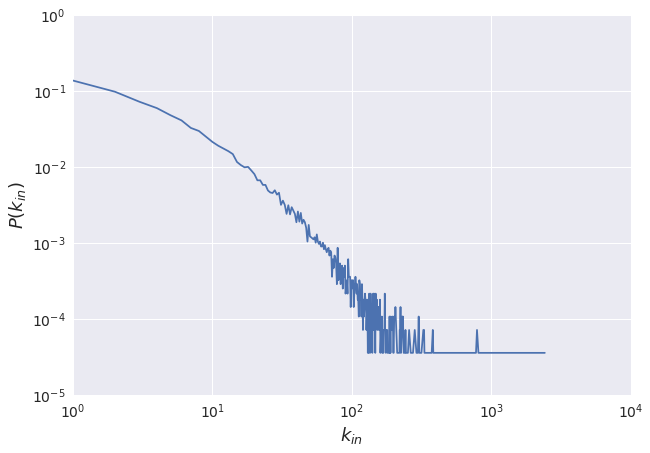

In [22]:
x=[]
y=[]
for i in sorted(degin_distri):   
    x.append(i)
    y.append(float(degin_distri[i])/len(H))

plt.figure(figsize=(10,7))    
plt.plot(np.array(x),np.array(y))

plt.xlabel('$k_{in}$', fontsize=18)
plt.ylabel('$P(k_{in})$', fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.yscale('log')
plt.xscale('log')
plt.axis([1,10000,0.00001,1.0])
plt.show()

Let's plot the degree out distribution

In [23]:
degout_distri=Counter(H.out_degree().values())
degout_distri

Counter({0: 2711,
         1: 2449,
         2: 1951,
         3: 1657,
         4: 1405,
         5: 1272,
         6: 1172,
         7: 1087,
         8: 975,
         9: 847,
         10: 790,
         11: 771,
         12: 651,
         13: 640,
         14: 622,
         15: 556,
         16: 519,
         17: 503,
         18: 498,
         19: 429,
         20: 412,
         21: 398,
         22: 384,
         23: 339,
         24: 304,
         25: 333,
         26: 284,
         27: 250,
         28: 244,
         29: 246,
         30: 240,
         31: 184,
         32: 194,
         33: 160,
         34: 166,
         35: 162,
         36: 149,
         37: 135,
         38: 111,
         39: 114,
         40: 104,
         41: 98,
         42: 91,
         43: 81,
         44: 77,
         45: 61,
         46: 55,
         47: 60,
         48: 51,
         49: 48,
         50: 45,
         51: 45,
         52: 39,
         53: 32,
         54: 34,
         55: 37,
         

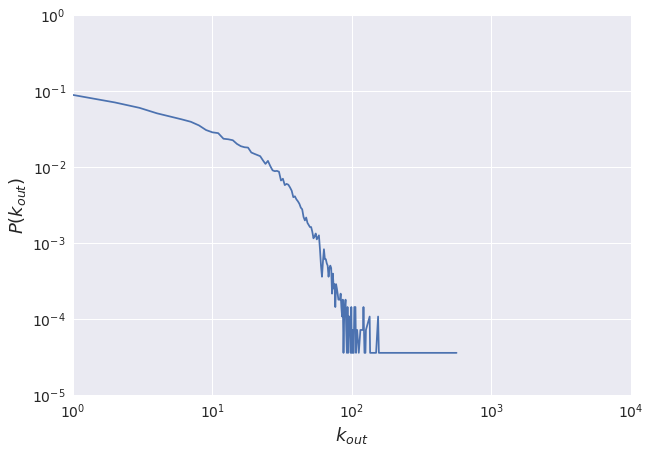

In [24]:
x=[]
y=[]
for i in sorted(degout_distri):   
    x.append(i)
    y.append(float(degout_distri[i])/len(H))

plt.figure(figsize=(10,7))    
plt.plot(np.array(x),np.array(y))

plt.xlabel('$k_{out}$', fontsize=18)
plt.ylabel('$P(k_{out})$', fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.yscale('log')
plt.xscale('log')
plt.axis([1,10000,0.00001,1.0])
plt.show()

### Export to gml (be careful this is a large network!)

The file in gml format can be visualized using the software tool Gephi (http://gephi.org).

In [25]:
nx.write_gml(H,'./citHepTh.gml')

# Visualizing a network with NetworkX

NetworkX combined with matplotlib can be used to visualize complex networks. 

It provides a good range of functionalities to obtain some basic and more refined visualization. More details are available in the [documentation](https://networkx.github.io/documentation/development/reference/drawing.html).

Notice, as stated in the documentation
>NetworkX provides basic functionality for visualizing graphs, but its main goal is to enable graph analysis rather than perform graph visualization. 
>In the future, graph visualization functionality may be removed from NetworkX or only available as an add-on package.


We generate a random Erdos-Renyi network and visualize it.

In [26]:
N=100
prob=0.05

In [27]:
ER=nx.erdos_renyi_graph(N, prob)

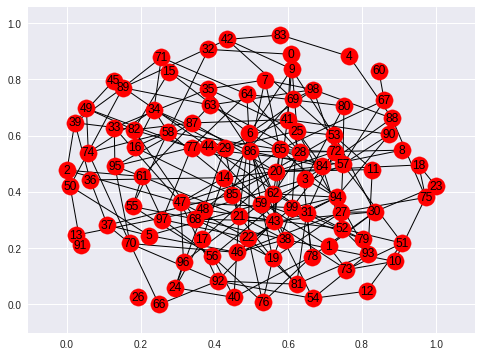

In [28]:
plt.figure(figsize=(8,6))
nx.draw_networkx(ER)

/home/carlo/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/carlo/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/carlo/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/carlo/anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is de

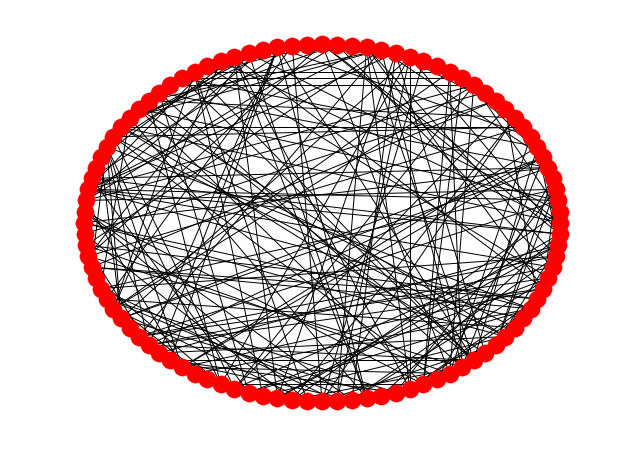

In [29]:
plt.figure(figsize=(8,6))
nx.draw_circular(ER)

/home/carlo/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/carlo/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/carlo/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/carlo/anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is de

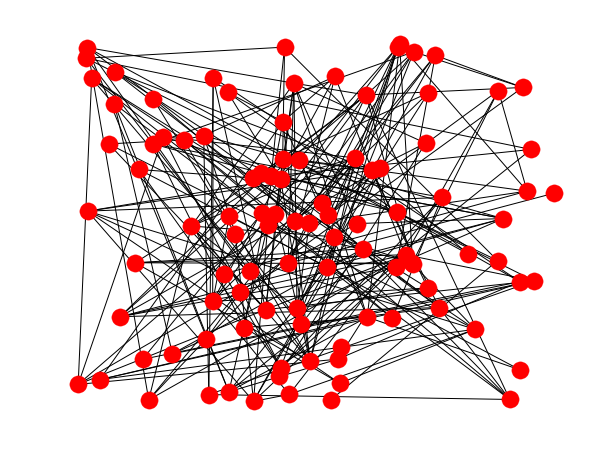

In [30]:
plt.figure(figsize=(8,6))
nx.draw_random(ER)

/home/carlo/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/carlo/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/carlo/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/carlo/anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is de

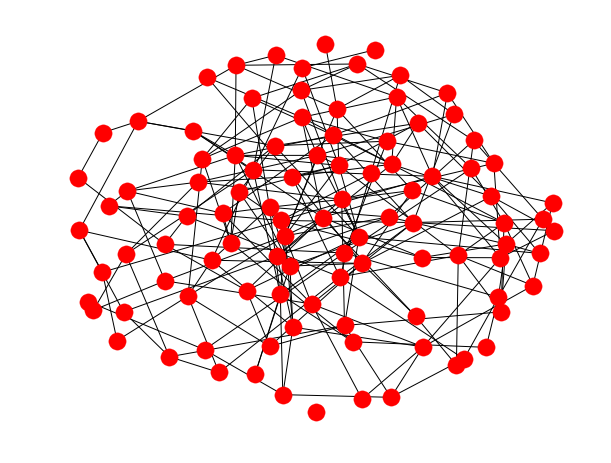

In [31]:
plt.figure(figsize=(8,6))
nx.draw_spring(ER)

In [32]:
pos=nx.spring_layout(ER)
pos

{0: array([ 0.36140827,  0.88887982]),
 1: array([ 0.59570334,  0.93271064]),
 2: array([ 0.23483967,  0.1051104 ]),
 3: array([ 0.85595542,  0.24673576]),
 4: array([ 0.99087509,  0.39427372]),
 5: array([ 0.08315157,  0.28840271]),
 6: array([ 0.47272489,  0.55844613]),
 7: array([ 0.5209648 ,  0.49915444]),
 8: array([ 0.925544  ,  0.29537181]),
 9: array([ 0.69630544,  0.70074976]),
 10: array([ 0.49901832,  0.92492282]),
 11: array([ 0.88610594,  0.70836682]),
 12: array([ 0.52779054,  0.99067203]),
 13: array([ 0.99481656,  0.56800445]),
 14: array([ 0.54552458,  0.66155183]),
 15: array([ 0.17955402,  0.68299559]),
 16: array([ 0.08630011,  0.69110344]),
 17: array([ 0.85322197,  0.63304222]),
 18: array([ 0.78482356,  0.87566176]),
 19: array([ 0.47774878,  0.30054308]),
 20: array([ 0.62323657,  0.58689837]),
 21: array([ 0.5096988 ,  0.44403353]),
 22: array([ 0.5602074 ,  0.17873508]),
 23: array([ 0.8352993 ,  0.85804841]),
 24: array([ 0.93693036,  0.36829559]),
 25: array

We can draw the network nodes only, and assign a specific location to each node.

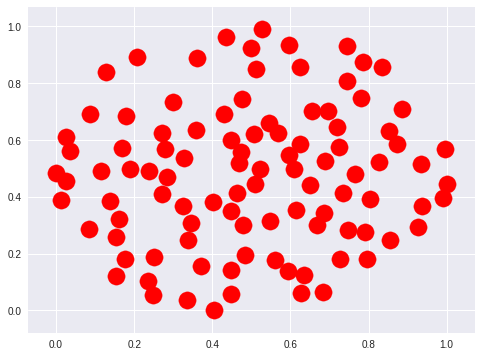

In [33]:
plt.figure(figsize=(8,6))
nx.draw_networkx_nodes(ER, pos)
#plt.axis('off')

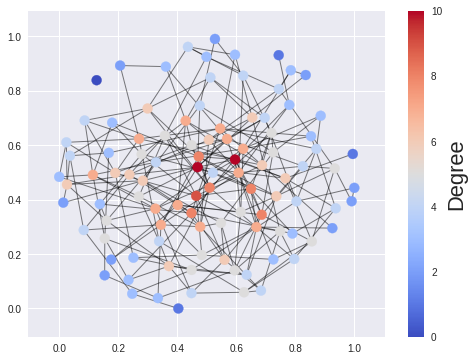

In [36]:
plt.figure(figsize=(8,6))

s=nx.draw_networkx_nodes(ER,
            pos,
            node_size=100.0,
            node_color=list(nx.degree(ER).values()),
            alpha=1,
            cmap=plt.cm.coolwarm
            )

nx.draw_networkx_edges(ER, pos, alpha=0.5)

#show the colorbar on the right side
cbar=plt.colorbar(s)
cbar.ax.set_ylabel('Degree', size=22)

#plt.axis('off')
plt.show()

# Visualizing a spatial network with NetworkX

We analyze the US airport network of year 2010. 
The network is available from the [network repository of Tore Opshal](https://toreopsahl.com/datasets/#usairports).

Weights represent the total number of passengers who traveled on that connection in a year.

Airport coordinates have been added by myself.


In [37]:
G=nx.Graph()
fh=open('./USairport_2010.txt','r')
for line in fh.readlines():
    s=line.strip().split()
    G.add_edge(int(s[0]),int(s[1]))
fh.close()    

In [38]:
len(G)

405

Is the network fully connected?

In [39]:
nx.number_connected_components(G)

2

In [40]:
c=list(nx.connected_components(G))
c[-1]

{1182, 1347}

We define three dictionaries associated to the network to store additional node's features: IATA code, aiport name, geographic coordinates.

In [41]:
G.code={}
G.name={}
G.pos={}

We extract nodes features from a file

In [42]:
finfo=open('./USairport_2010_codes.txt','r')
for line in finfo.readlines():
    s=line.strip().split()
    node=int(s[0])
    G.code[node]=s[1]
    G.name[node]=s[2]
    G.pos[node]=[float(s[4]),float(s[3])]
finfo.close() 

Draw the network

(-127.05403301931048,
 -65.233466980689499,
 23.33714761709437,
 50.012852382905628)

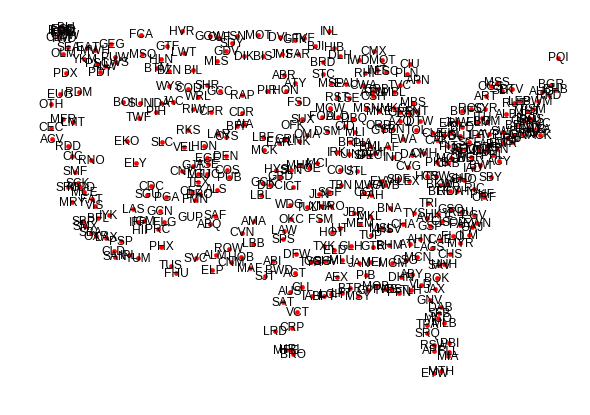

In [43]:
fig=plt.figure(figsize=(10,7))

nx.draw_networkx_nodes(G,
            pos=G.pos,
            node_size=20
            )

nx.draw_networkx_labels(G,
            pos=G.pos,
            labels=G.code
            )

plt.axis('off')

We would like to draw the edges but there are too many of them.

In [44]:
len(G.edges())

8251

We select only the strongest connections as a subgraph of G by setting a threshold on the annual passengers volume.

In [45]:
weight_threshold=700000

In [46]:
H=nx.Graph()

H.pos={}
H.code={}
H.name={}

fh=open('./USairport_2010.txt','r')
for line in fh.readlines():
    s=line.strip().split()
    node1=int(s[0])
    node2=int(s[1])
    
    if int(s[2])>weight_threshold:
        H.add_edge(node1,node2)
        
        H.pos[node1]=G.pos[node1]
        H.pos[node2]=G.pos[node2]
        
        H.code[node1]=G.code[node1]
        H.code[node2]=G.code[node2]
        
        H.name[node1]=G.name[node1]
        H.name[node2]=G.name[node2]
        
        
fh.close()

We draw the network and color code the nodes by their degree.

(-127.78749857243648,
 -65.199065578833967,
 23.338069889061302,
 50.0119301109387)

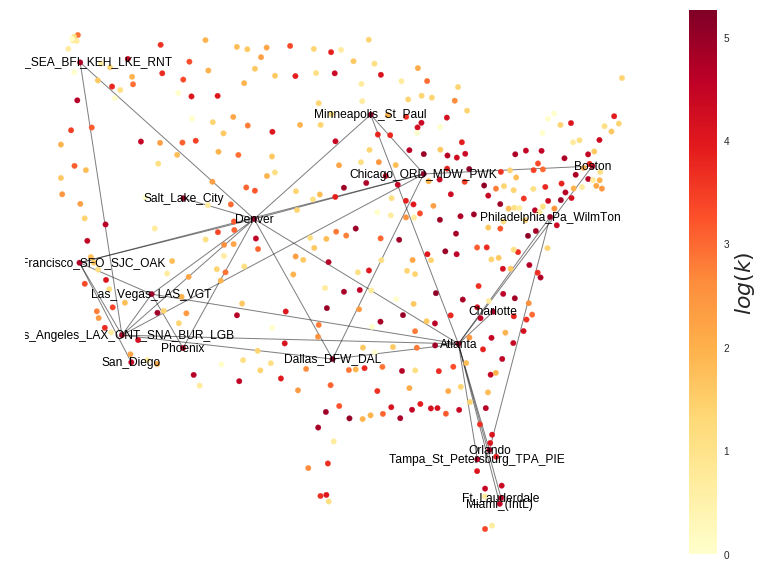

In [47]:
import math
fig=plt.figure(figsize=(14,10))

s=nx.draw_networkx_nodes(G,
            pos=G.pos,
            node_color=[math.log(G.degree(v)) for v in G],
            node_size=30,
            cmap=plt.cm.YlOrRd
            )

nx.draw_networkx_edges(H,
            pos=G.pos,
            alpha=0.5
            )

nx.draw_networkx_labels(H,
            pos=H.pos,
            labels=H.name
            )

cbar=plt.colorbar(s)
cbar.ax.set_ylabel('$log(k)$', size=22)

plt.axis('off')

What is the node with the largest degree?

In [49]:
max(G.degree().items(), key=itemgetter(1))

(389, 192)

In [50]:
G.name[389]

'Denver'

# Data visualization with NetworkX

The easy interface of NetworkX and matplotlib to draw georeferenced data can be used to visualize all type of data points with geo-coordinates. 

A nice example comes from the electoral results of the municipality of Turin available at [the Open Data repository AperTO](http://aperto.comune.torino.it/?q=taxonomy/term/111).

Electoral data can be geo-referenced through the [dataset containing every street number of the city with its coordinates](http://aperto.comune.torino.it/?q=node/504).

Based on this idea, we created a Web-interface to explore electoral data of the city of Torino: [Il colore di Torino](http://datainterfaces.org/projects/ilcoloreditorino/)